In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir=r"C:\Data Files\Project - Cat and Dogs\train"
validation_dir=r"C:\Data Files\Project - Cat and Dogs\validation"
test_dir=r"C:\Data Files\Project - Cat and Dogs\test"

# DATA PREPROCESSING

1. Read the picture files.
2. Decode the Jpeg content to RBG grids of pixels.
3. Convert these to floating point tensors.
4. Rescale the pixel values to the [0,1] interval.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255 , 
                                   rotation_range=40 ,
                                   width_shift_range=0.2 ,
                                   height_shift_range=0.2 ,
                                   shear_range=0.2 , 
                                   zoom_range=0.2 , 
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir , target_size=(150,150) , batch_size=20 , class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir , target_size=(150,150) , batch_size=20 , class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights="imagenet" , include_top=False , input_shape = (150,150,3))

58892288/58889256 [==============================] - 268s 5us/step


In [9]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [10]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy" , optimizer=optimizers.RMSprop(lr=2e-5) , metrics=["acc"])

In [13]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5" , save_best_only=True)

In [15]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data = validation_generator,
                             validation_steps=50,
                             callbacks=[checkpoint_cb])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 505s 5s/step - loss: 0.4615 - acc: 0.7690 - val_loss: 0.2098 - val_acc: 0.9090
Epoch 2/30
100/100 [==============================] - 516s 5s/step - loss: 0.2516 - acc: 0.8960 - val_loss: 0.1050 - val_acc: 0.9620
Epoch 3/30
100/100 [==============================] - 675s 7s/step - loss: 0.1896 - acc: 0.9195 - val_loss: 0.1380 - val_acc: 0.9500
Epoch 4/30
100/100 [==============================] - 842s 8s/step - loss: 0.1802 - acc: 0.9280 - val_loss: 0.3136 - val_acc: 0.8900
Epoch 5/30
100/100 [==============================] - 842s 8s/step - loss: 0.1545 - acc: 0.9380 - val_loss: 0.1487 - val_acc: 0.9370
Epoch 6/30
100/100 [==============================] - 838s 8s/step - loss: 0.1274 - acc: 0.9470 - val_loss: 0.1133 - val_acc: 0.9570
Epoch 7/30
100/100 [==============================] - 841s 8s/step - loss: 0.1266 - acc: 0.9505 - val_loss: 0.0708 - val_acc: 

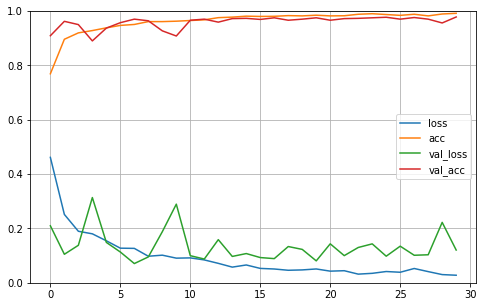

In [16]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
hist_df = pd.DataFrame(history.history)

In [19]:
hist_csv_file = "history.csv" 
with open (hist_csv_file , mode='w') as f:
    hist_df.to_csv(f)

In [20]:
test_generator = test_datagen.flow_from_directory(test_dir , target_size=(150,150) , batch_size=20 , class_mode="binary")

Found 1000 images belonging to 2 classes.


In [21]:
model.evaluate_generator(test_generator , steps=50)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.18238511681556702, 0.9679999947547913]